In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
economy = pd.read_csv('economy.csv').drop('Entity', axis=1)
emission = pd.read_csv('emission.csv').drop('Entity', axis=1)

economy_dict = economy.groupby('Year').apply(lambda x: x.set_index('Code')['GDP Per Capita'].to_dict()).to_dict()
emission_dict = emission.groupby('Year').apply(lambda x: x.set_index('Code')['CO2 Emissions Per Capita'].to_dict()).to_dict()

C:\Users\kahns\AppData\Local\Temp\ipykernel_17460\811711561.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  economy_dict = economy.groupby('Year').apply(lambda x: x.set_index('Code')['GDP Per Capita'].to_dict()).to_dict()
C:\Users\kahns\AppData\Local\Temp\ipykernel_17460\811711561.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  emission_dict = emission.groupby('Year').apply(lambda x: x.set_index('Co

In [80]:
max_k = 20
x1 = []
y1 = []

for key in economy_dict.keys():
    xtemp = []
    ytemp = []
    for k in range(1, max_k + 1):
        xtemp.append(k)
        ytemp.append(np.corrcoef(list(economy_dict[key].values()), list(emission_dict[key].values()))[0, 1])

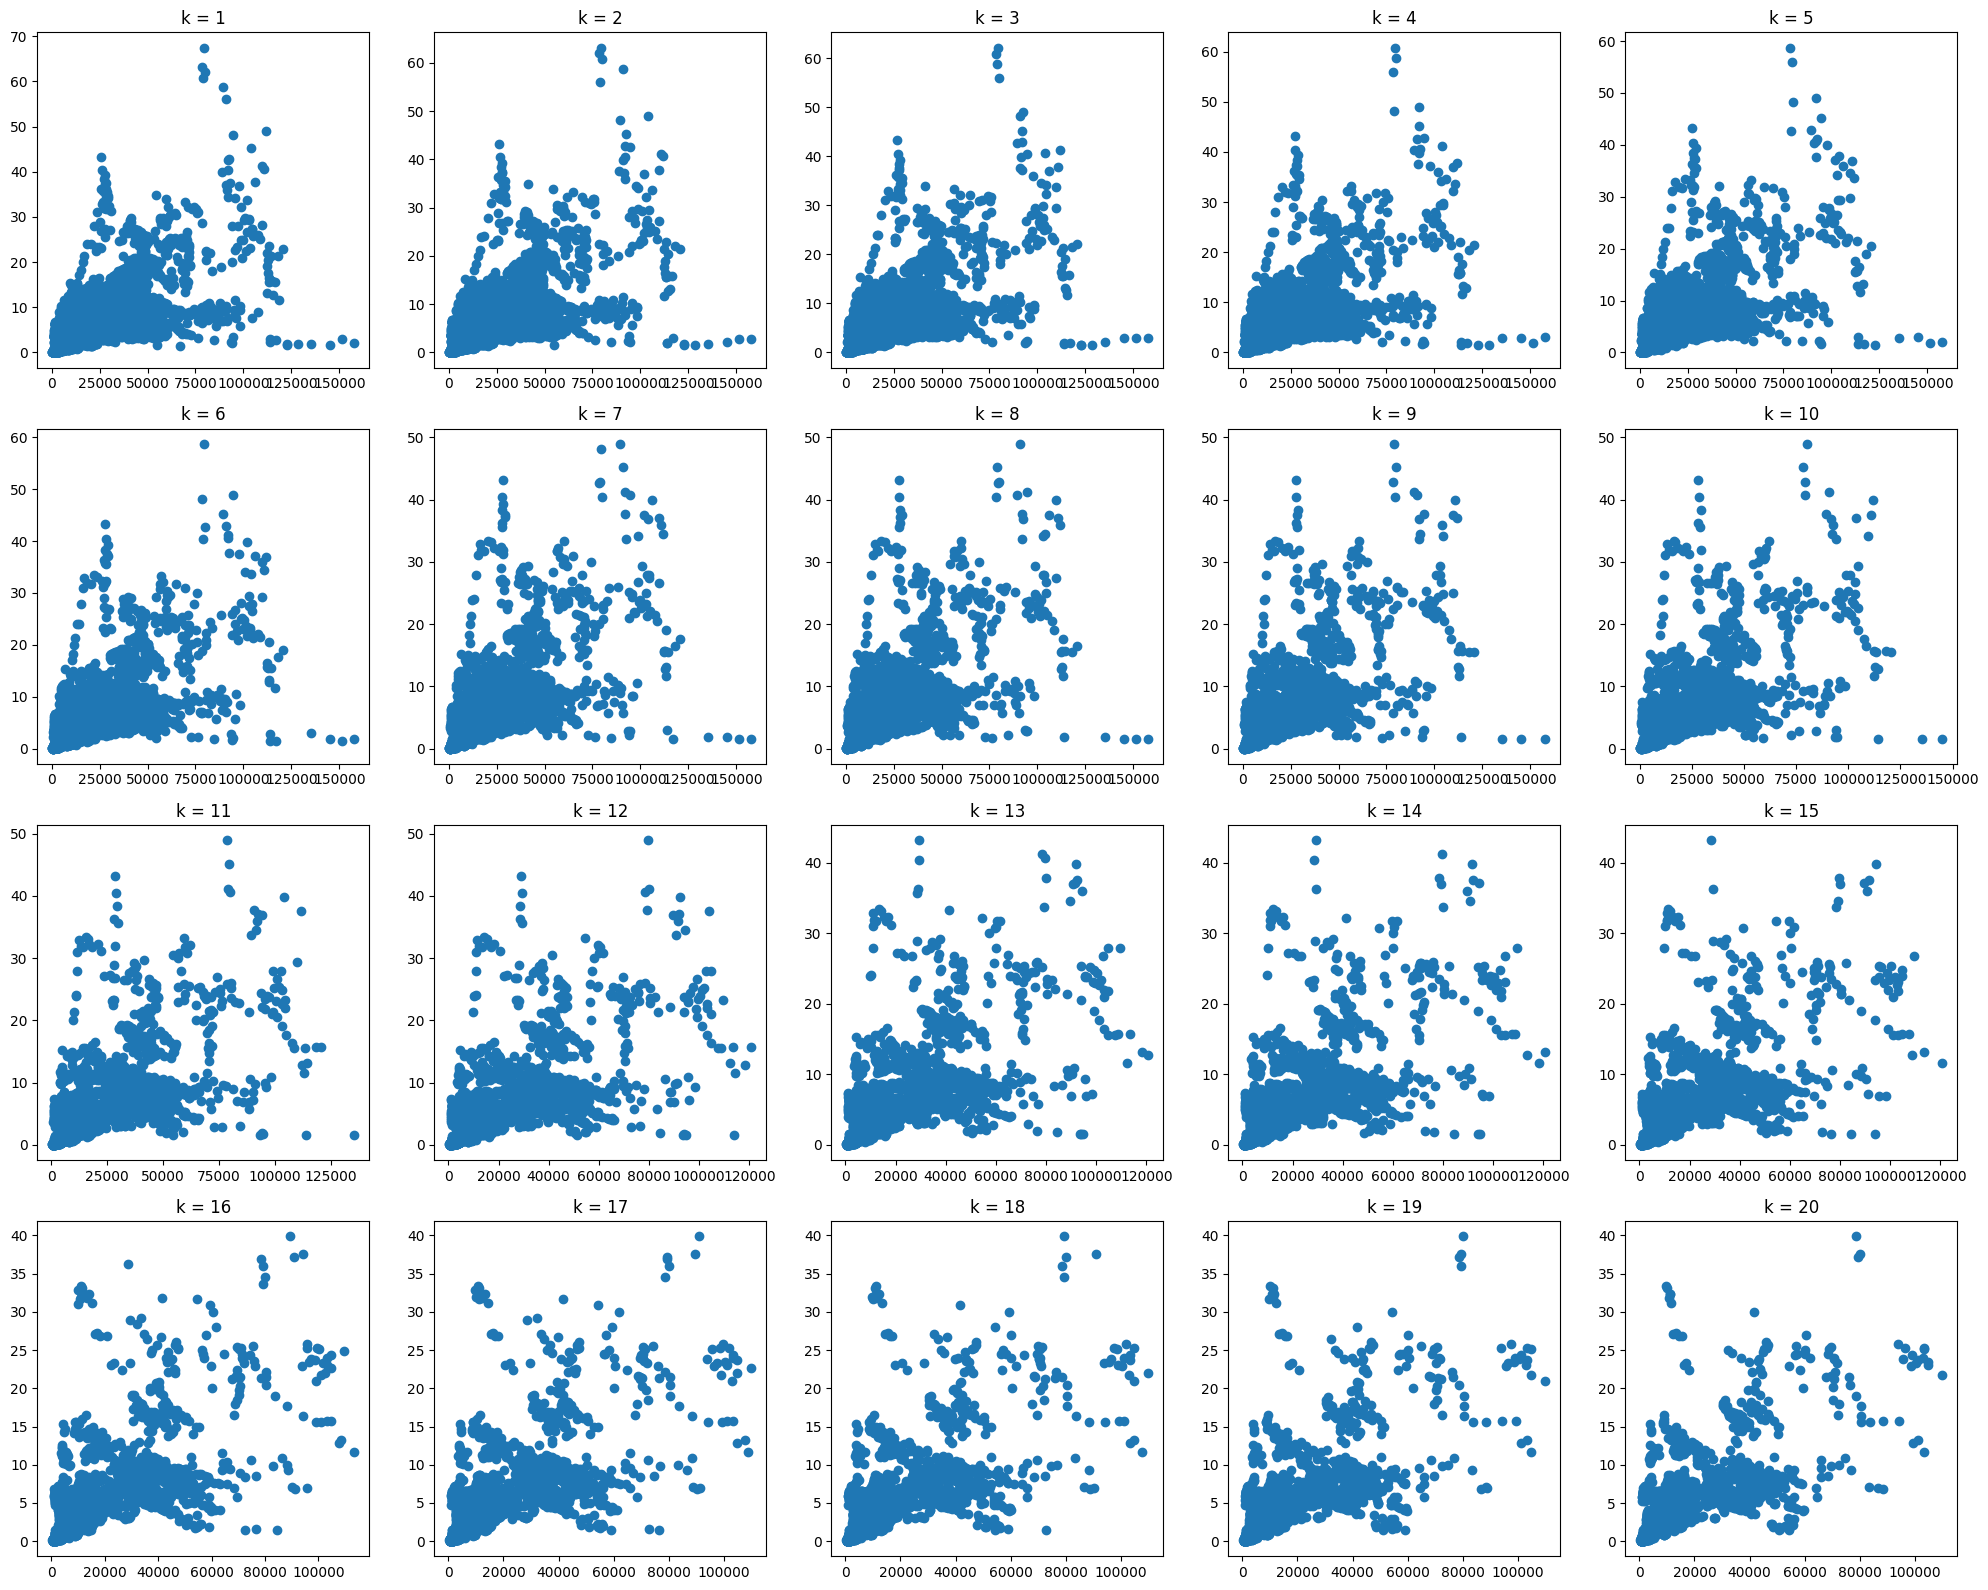

In [81]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
for row in range(4):
    for col in range(5):
        axes[row, col].scatter(x1[row * 5 + col], y1[row * 5 + col])
        axes[row, col].set_title(f'k = {row * 5 + col + 1}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

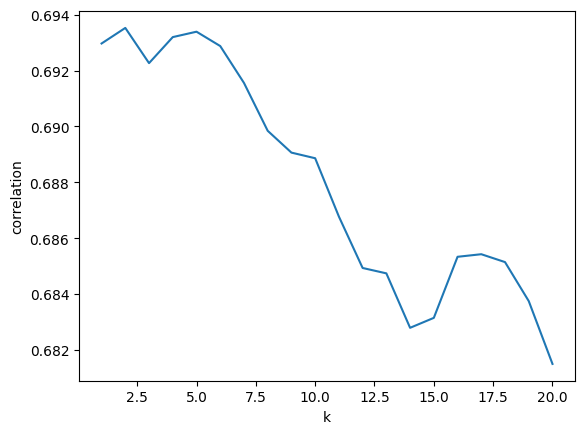

In [83]:
correlations1 = []
for pos in range(len(x1)):
    correlations1.append(np.corrcoef(x1[pos], y1[pos])[0, 1])
plt.plot(range(1, max_k + 1), correlations1)
plt.xlabel('k')
plt.ylabel('correlation')
plt.show()